In [480]:
import json
import os
import math
import matplotlib.pyplot as plt
from dateutil import parser


## Get data from files

In [481]:
#paths =[r"aws-serverless-1\performance_test\GET-1-0-1h-5r\test_#1",
#        r"aws-serverless-1\performance_test\GET-1-0-1h-10r\test_#1",
#        r"azure-serverless-1\performance_test\GET-1-0-1h-10r\test_#1",]
paths =[r"azure-serverless-1\breakepoint_test\POST-1-0-5m-300r\test_#1"]

summary_paths = []
results_paths = []
for path in paths:
    summary_paths.append(os.path.join(path, 'summary_test.json'))
    results_paths.append(os.path.join(path, 'results_test.json'))

In [482]:
summary_data = []
for path in summary_paths:
    with open(path, 'r') as file:
        summary_data.append(json.load(file))

In [483]:
results_data = []
for i in range (0, len(results_paths)):
    results_data.append([])
    with open(results_paths[i], 'r') as file:
        for line in file:
            results_data[i].append(json.loads(line))            

## Plots for const rate

In [484]:
time_start = []

for i in range (0, len(results_paths)):
    time = parser.isoparse(results_data[i][1]['data']['time'])
    time_start.append(int(time.timestamp()))

time_unit = 60

In [485]:
x_time_sec = []
x_time_min = []
x_time_vus = []
x_time_duration = []
x_time_correct_duration = []
x_reqs = []
x_reqs_duration = []
x_sec = []

y_correct = []
y_correct_duration = []
y_rate = []
y_vus = []
y_duration = []
y_reqs_sec = []

In [486]:
for i in range (0, len(results_paths)):
    correct = 0
    correct_duration = 0
    incorrect = 0
    reqs_duration_counter = 0
    x_time_sec.append([])
    x_time_min.append([])
    x_time_vus.append([])
    x_time_duration.append([])
    x_time_correct_duration.append([])
    x_reqs.append([])
    x_reqs_duration.append([])
    x_sec.append([])
    y_correct.append([])
    y_correct_duration.append([])
    y_rate.append([])
    y_vus.append([])
    y_duration.append([])
    y_reqs_sec.append([])
    for j in range(0, len(results_data[i])):
        if results_data[i][j]['metric'] == "http_reqs":
            if 'time' in results_data[i][j]['data']:
                time = int(parser.isoparse(results_data[i][j]['data']['time']).timestamp())
                x_time_sec[i].append((time - time_start[i]))
                x_time_min[i].append((time - time_start[i])/time_unit)
                if results_data[i][j]['data']['tags']['expected_response'] == "true":
                    y_correct[i].append(1)
                    correct += 1
                else:
                    y_correct[i].append(0)
                    incorrect += 1
                x_reqs[i].append(correct + incorrect)
                y_rate[i].append(100 * correct / (correct + incorrect))
        
        if results_data[i][j]['metric'] == "vus":
            if 'time' in results_data[i][j]['data']:
                time = int(parser.isoparse(results_data[i][j]['data']['time']).timestamp())
                x_time_vus[i].append((time - time_start[i])/time_unit)
                y_vus[i].append(results_data[i][j]['data']['value'])

        if results_data[i][j]['metric'] == "http_req_duration":
            if 'time' in results_data[i][j]['data']:
                reqs_duration_counter += 1
                time = int(parser.isoparse(results_data[i][j]['data']['time']).timestamp())
                x_time_duration[i].append((time - time_start[i])/time_unit)
                x_reqs_duration[i].append(reqs_duration_counter)
                y_duration[i].append(results_data[i][j]['data']['value'])
                if results_data[i][j]['data']['tags']['expected_response'] == "true":
                    x_time_correct_duration[i].append((time - time_start[i])/time_unit)
                    y_correct_duration[i].append(results_data[i][j]['data']['value'])

    for single_sec in set(x_time_sec[0]):
        reqs_counter = 0
        for sec in x_time_sec[0]:
            if sec == single_sec:
                reqs_counter += 1
        y_reqs_sec[i].append(reqs_counter)
        x_sec[i].append(single_sec)

### Server response correctness plot (single plot)

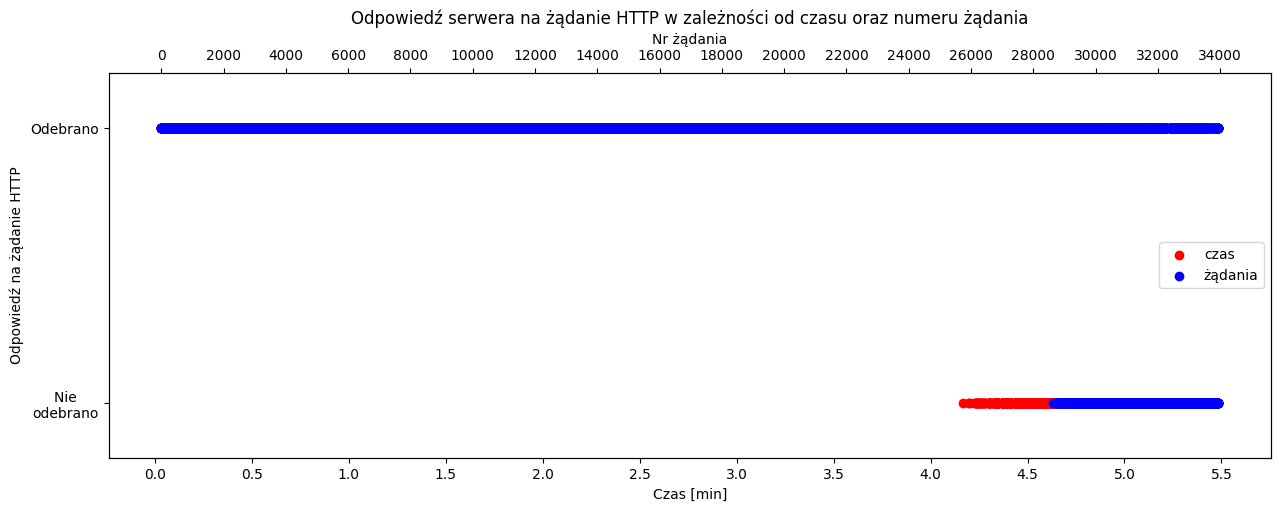

In [497]:
plot = 0

fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.scatter(x_time_min[plot], y_correct[plot], label='czas', color='red')
ax2 = ax1.twiny()
ax2.scatter(x_reqs[plot], y_correct[plot], label='żądania', color='blue')

ax1.set_ylim(-0.2, 1.2)
ax1.set_yticks([0, 1], ['Nie     \nodebrano', 'Odebrano'])
ax1.locator_params(axis='x', nbins=20)
ax2.locator_params(axis='x', nbins=20)
ax1.set_xlabel('Czas [min]')
ax2.set_xlabel('Nr żądania')
ax1.set_ylabel('Odpowiedź na żądanie HTTP')
ax1.set_title('Odpowiedź serwera na żądanie HTTP w zależności od czasu oraz numeru żądania')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='right')

plt.show()

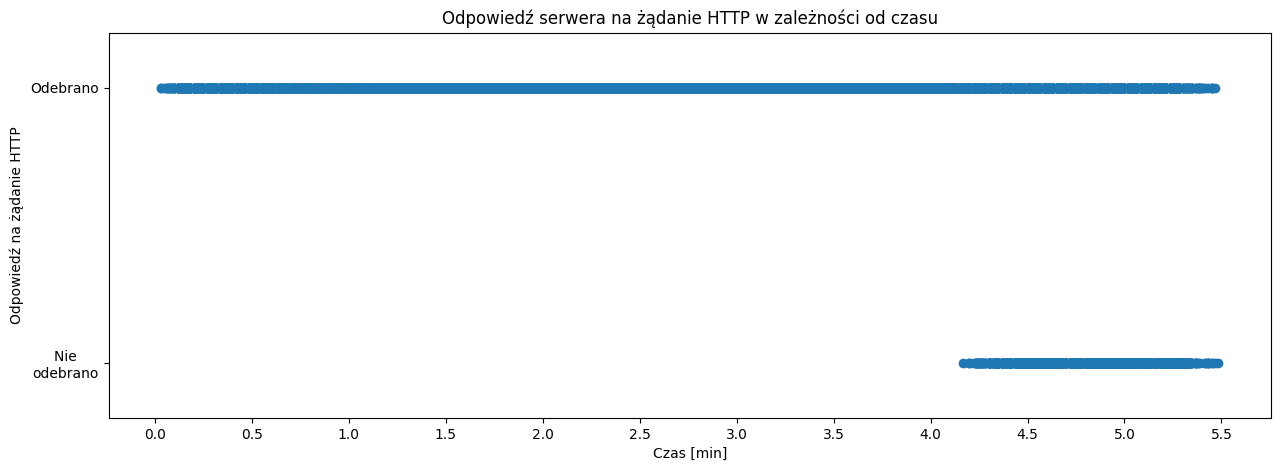

In [488]:
plot = 0
plt.figure(figsize=(15, 5))
plt.scatter(x_time_min[plot], y_correct[plot])
plt.ylim(-0.2, 1.2) 
plt.yticks([0, 1], ['Nie     \nodebrano', 'Odebrano'])
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Czas [min]')
plt.ylabel('Odpowiedź na żądanie HTTP')
plt.title('Odpowiedź serwera na żądanie HTTP w zależności od czasu')
plt.show()

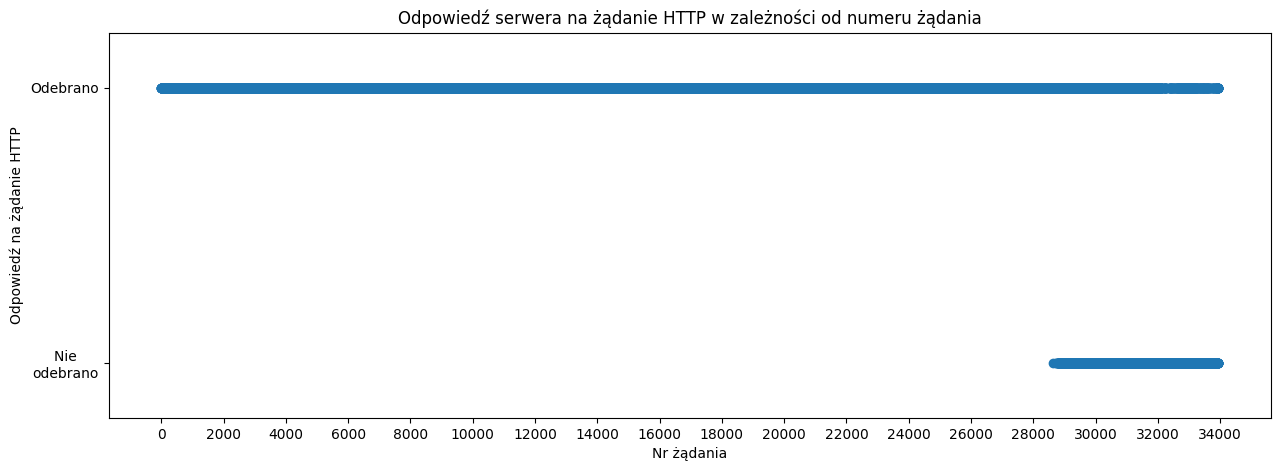

In [499]:
plot = 0
plt.figure(figsize=(15, 5))
plt.scatter(x_reqs[plot], y_correct[plot])
plt.ylim(-0.2, 1.2) 
plt.yticks([0, 1], ['Nie     \nodebrano', 'Odebrano'])
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Nr żądania')
plt.ylabel('Odpowiedź na żądanie HTTP')
plt.title('Odpowiedź serwera na żądanie HTTP w zależności od numeru żądania')
plt.show()

### Comparing the ratios of correct response to all requests

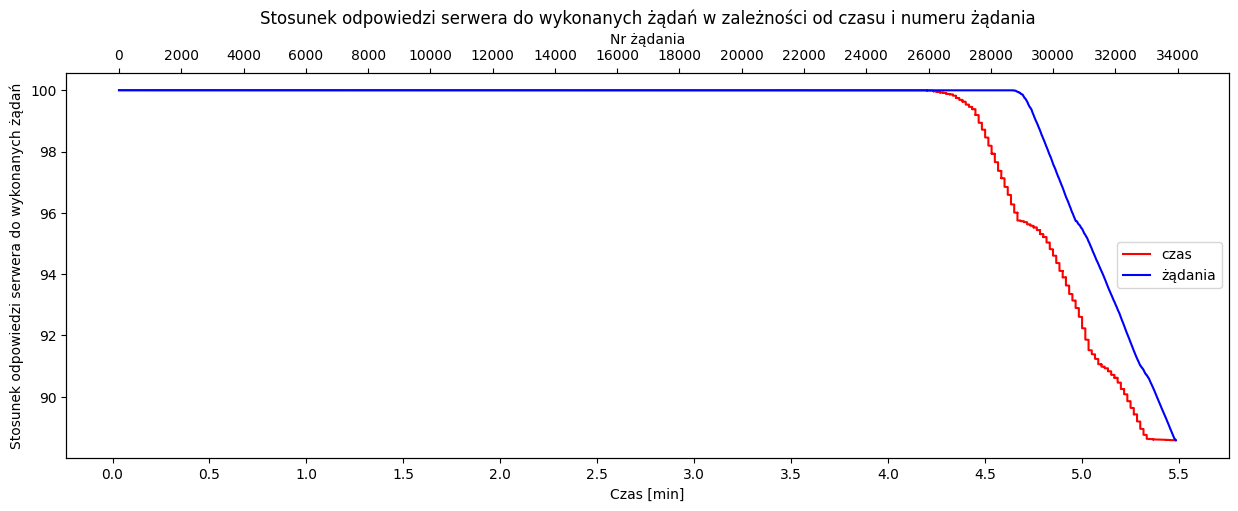

In [500]:
plot = 0

fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.plot(x_time_min[plot], y_rate[plot], label='czas', color='red')
ax2 = ax1.twiny()
ax2.plot(x_reqs[plot], y_rate[plot], label='żądania', color='blue')

ax1.locator_params(axis='x', nbins=20)
ax2.locator_params(axis='x', nbins=20)
ax1.set_xlabel('Czas [min]')
ax2.set_xlabel('Nr żądania')
ax1.set_ylabel('Stosunek odpowiedzi serwera do wykonanych żądań')
ax1.set_title('Stosunek odpowiedzi serwera do wykonanych żądań w zależności od czasu i numeru żądania')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='right')

plt.show()

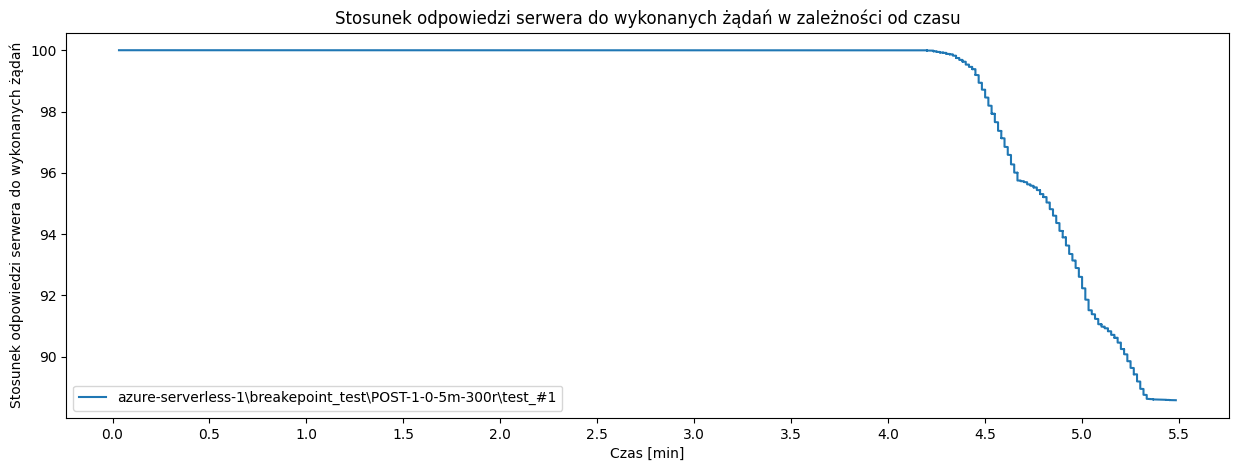

In [491]:
plt.figure(figsize=(15, 5))
for i in range (0, len(results_paths)):
    plt.plot(x_time_min[i], y_rate[i], label = paths[i])
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Czas [min]')
plt.ylabel('Stosunek odpowiedzi serwera do wykonanych żądań')
plt.title('Stosunek odpowiedzi serwera do wykonanych żądań w zależności od czasu')
plt.legend()
plt.show()

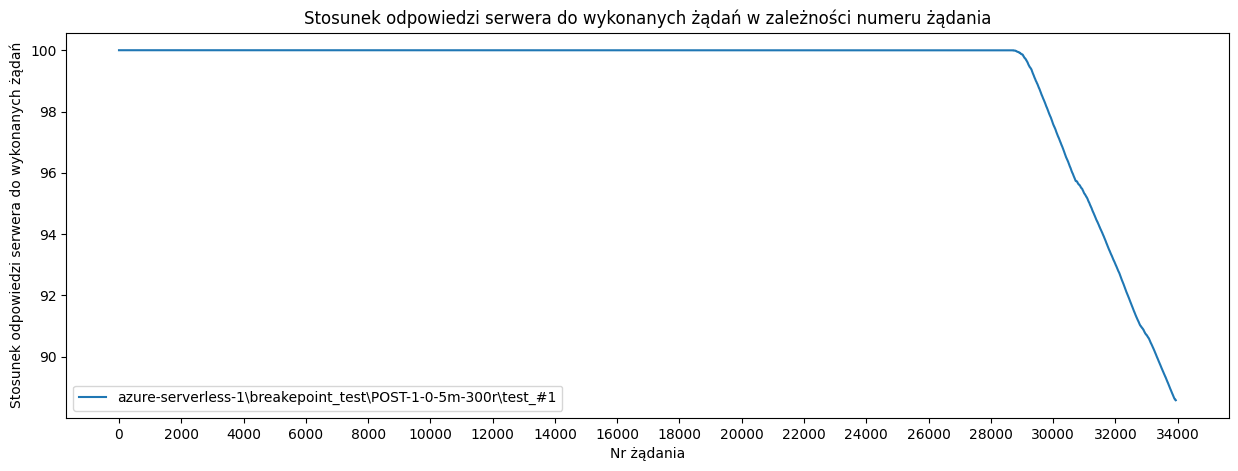

In [492]:
plt.figure(figsize=(15, 5))
for i in range (0, len(results_paths)):
    plt.plot(x_reqs[i], y_rate[i], label = paths[i])
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Nr żądania')
plt.ylabel('Stosunek odpowiedzi serwera do wykonanych żądań')
plt.title('Stosunek odpowiedzi serwera do wykonanych żądań w zależności numeru żądania')
plt.legend()
plt.show()

### Plot of virtual users in time/requests (single plot)

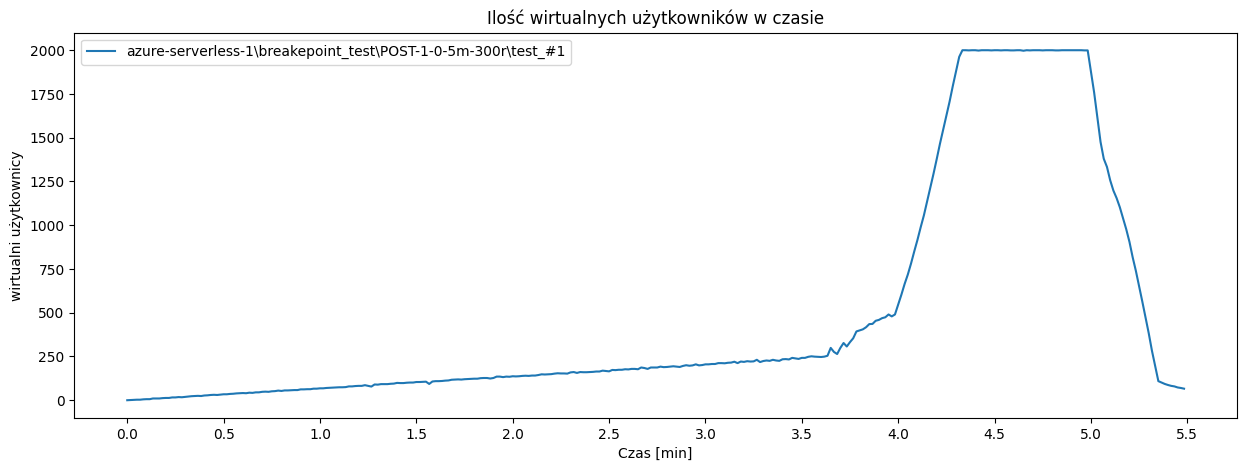

In [493]:
plot = 0
plt.figure(figsize=(15, 5))
plt.plot(x_time_vus[plot], y_vus[plot], label = paths[plot])
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Czas [min]')
plt.ylabel('wirtualni użytkownicy')
plt.title('Ilość wirtualnych użytkowników w czasie')
plt.legend()
plt.show()

### Plot of request response time in time (single plot)

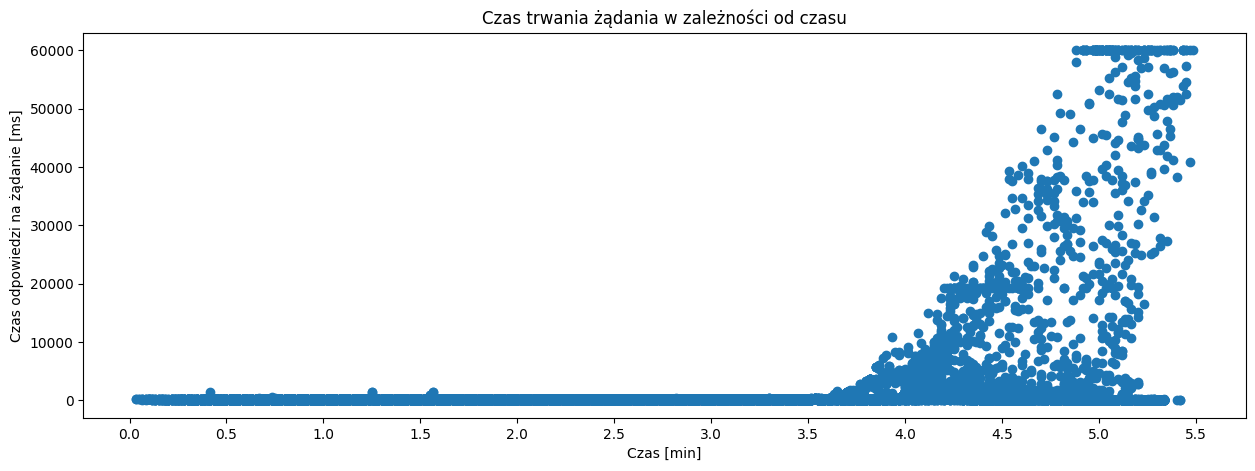

In [494]:
plot = 0
plt.figure(figsize=(15, 5))
plt.scatter(x_time_duration[plot], y_duration[plot])
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Czas [min]')
plt.ylabel('Czas odpowiedzi na żądanie [ms]')
plt.title('Czas trwania żądania w zależności od czasu')
plt.show()

### Plot of correct request response time in time (single plot)

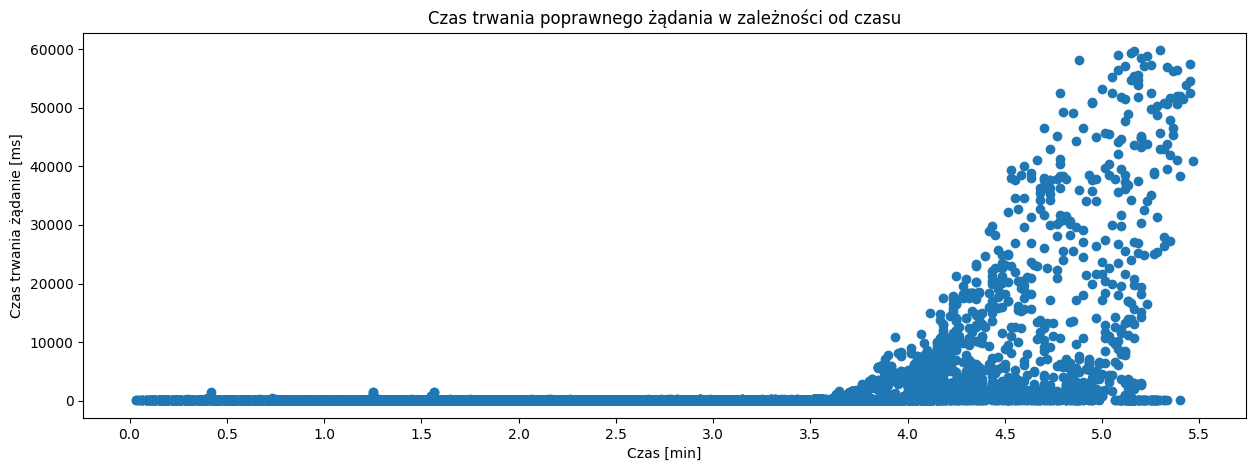

In [495]:
plot = 0
plt.figure(figsize=(15, 5))
plt.scatter(x_time_correct_duration[plot], y_correct_duration[plot])
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Czas [min]')
plt.ylabel('Czas trwania żądanie [ms]')
plt.title('Czas trwania poprawnego żądania w zależności od czasu')
plt.show()

## Plots for variable rate

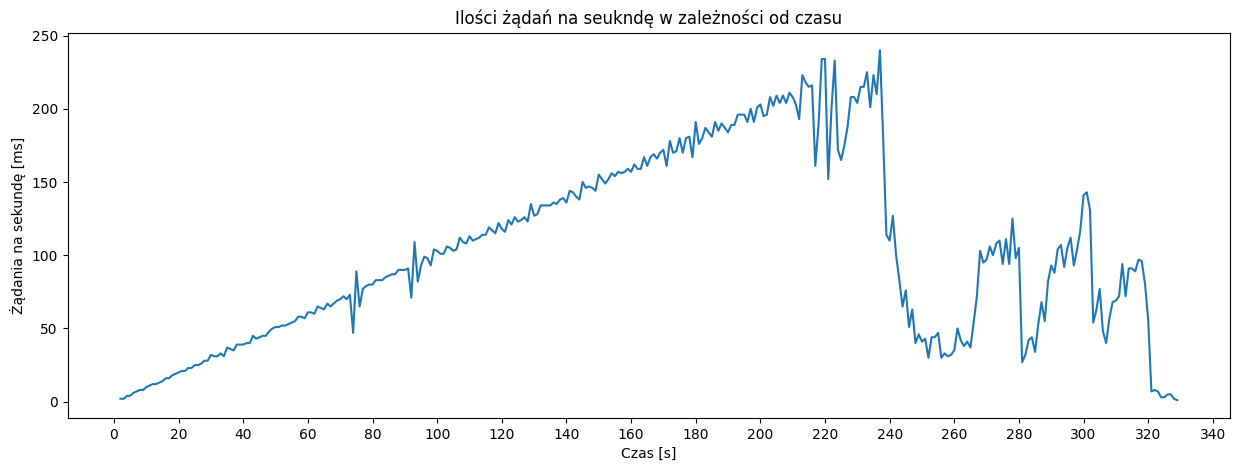

In [501]:
plot = 0
plt.figure(figsize=(15, 5))
plt.plot(x_sec[plot], y_reqs_sec[plot])
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Czas [s]')
plt.ylabel('Żądania na sekundę [ms]')
plt.title('Ilości żądań na seukndę w zależności od czasu')
plt.show()